<a href="https://colab.research.google.com/github/Aashrith1072/price-prediction-ml/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction for Online Marketplace Products

## Problem Statement
The goal of this project is to build a machine learning model that predicts
the price of products listed on online marketplaces using product attributes
such as brand, category, and ratings.

## Environment
This notebook was developed and executed using Google Colab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Data Loading
The dataset is loaded and inspected to understand its structure.


In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashrith187","key":"1fce094b2e1bc60ce55cad4074cbd554"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d asaniczka/amazon-uk-products-dataset-2023


Dataset URL: https://www.kaggle.com/datasets/asaniczka/amazon-uk-products-dataset-2023
License(s): ODC Attribution License (ODC-By)
 91% 119M/131M [00:00<00:00, 1.22GB/s]
100% 131M/131M [00:00<00:00, 1.13GB/s]


In [8]:
!unzip amazon-uk-products-dataset-2023.zip


Archive:  amazon-uk-products-dataset-2023.zip
  inflating: amz_uk_processed_data.csv  


In [9]:
!ls


amazon-uk-products-dataset-2023.zip  kaggle.json
amz_uk_processed_data.csv	     sample_data


In [10]:
import pandas as pd

df = pd.read_csv(
    'amz_uk_processed_data.csv',
    nrows=100000
)

df.head()


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [11]:
df.columns


Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               100000 non-null  object 
 1   title              100000 non-null  object 
 2   imgUrl             100000 non-null  object 
 3   productURL         100000 non-null  object 
 4   stars              100000 non-null  float64
 5   reviews            100000 non-null  int64  
 6   price              100000 non-null  float64
 7   isBestSeller       100000 non-null  bool   
 8   boughtInLastMonth  100000 non-null  int64  
 9   categoryName       100000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 7.0+ MB


In [14]:
df = df[
    ['price', 'stars', 'reviews', 'isBestSeller',
     'boughtInLastMonth', 'categoryName']
]

df.head()


,price,stars,reviews,isBestSeller,boughtInLastMonth,categoryName
0,21.99,4.7,15308,False,0,Hi-Fi Speakers
1,23.99,4.7,98099,True,0,Hi-Fi Speakers
2,21.99,4.7,15308,False,0,Hi-Fi Speakers
3,31.99,4.7,7205,False,0,Hi-Fi Speakers
4,17.99,4.6,1881,False,0,Hi-Fi Speakers


In [15]:
df['isBestSeller'] = df['isBestSeller'].astype(int)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['categoryName'] = le.fit_transform(df['categoryName'])


In [17]:
X = df.drop('price', axis=1)
y = df['price']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression MAE: 71.05822735648465
Linear Regression RMSE: 242.38234235055288


##Decision Tree Model


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [22]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("Decision Tree MAE:", mae_dt)
print("Decision Tree RMSE:", rmse_dt)


Decision Tree MAE: 61.94690726992311
Decision Tree RMSE: 233.8454801739794


## Model Comparison

| Model | MAE | RMSE |
|------|-----|------|
| Linear Regression | 71.06 | 242.38 |
| Decision Tree | 61.95 | 233.85 |

Decision Tree performed better due to its ability to capture non-linear
relationships in product pricing.


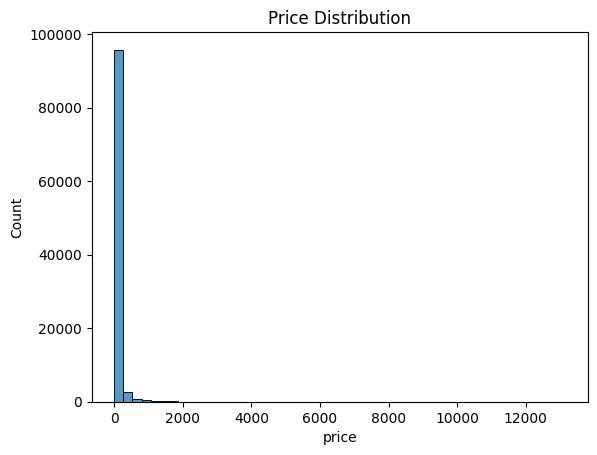

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()


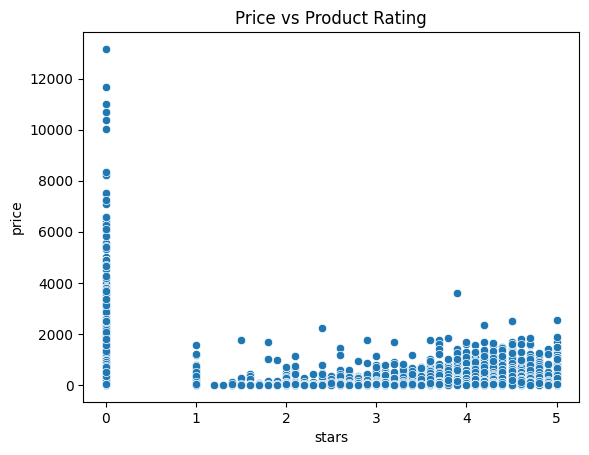

In [24]:
sns.scatterplot(x=df['stars'], y=df['price'])
plt.title("Price vs Product Rating")
plt.show()


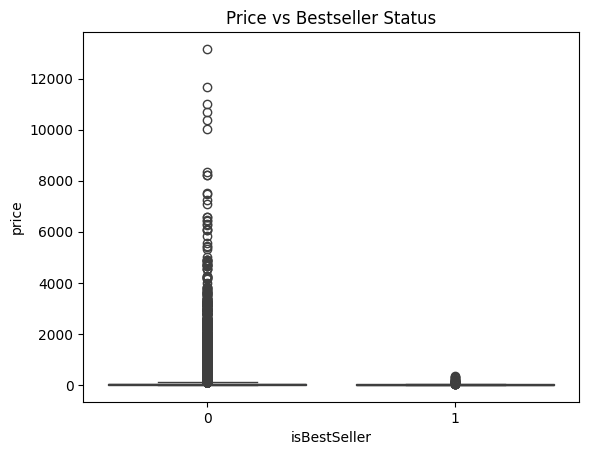

In [25]:
sns.boxplot(x=df['isBestSeller'], y=df['price'])
plt.title("Price vs Bestseller Status")
plt.show()
